In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [112]:
df = pd.read_csv('datasets/Train.csv')
df = df.dropna()

df = df.drop(columns='ID')

mapeamento = {'Cat_1': 1, 'Cat_2': 2, 'Cat_3': 3, 'Cat_4': 4, 'Cat_5': 5, 'Cat_6': 6, 'Cat_7': 7 }
df['Var_1'] = df['Var_1'].replace(mapeamento)

mapeamento = {'Male': 0, 'Female':1}
df['Gender'] = df['Gender'].replace(mapeamento)

mapeamento = {'No': 0, 'Yes':1}
df['Ever_Married'] = df['Ever_Married'].replace(mapeamento)
df['Graduated'] = df['Graduated'].replace(mapeamento)

mapeamento = {
    'Healthcare': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Artist': 4,
    'Doctor': 5,
    'Homemaker': 6,
    'Entertainment': 7,
    'Marketing': 8,
    'Executive': 9
}

df['Profession'] = df['Profession'].replace(mapeamento)


mapeamento = {
    'Low': 1,
    'High': 2,
    'Average': 3,
}
df['Spending_Score'] = df['Spending_Score'].replace(mapeamento)

df['Spending_Score'].unique()



X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,1,1.0,1,4.0,4
2,1,1,67,1,2,1.0,1,1.0,6
3,0,1,67,1,3,0.0,2,2.0,6
5,0,1,56,0,4,0.0,3,2.0,6
6,0,0,32,1,1,1.0,1,3.0,6


In [113]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exemplo de conjunto de dados

# Passo 1: Normalizar os dados (opcional, mas recomendado)
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(X)

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
pca.fit(df_normalizado)

# Passo 3: Transformar os dados
df_pca = pca.transform(df_normalizado)

# Convertendo o resultado para um DataFrame para melhor visualização
df_pca = pd.DataFrame(df_pca, columns=['Componente_1', 'Componente_2'])

print("Dados após PCA:")
print(df_pca)


Dados após PCA:
      Componente_1  Componente_2
0         2.553748      1.171235
1        -1.045340     -1.975595
2        -1.808147     -0.355536
3        -1.503194      1.008654
4         1.286460     -0.601007
...            ...           ...
6660     -0.788433      1.157882
6661      1.315096      1.485902
6662      1.240880     -2.111561
6663      1.767712     -0.845048
6664     -1.736574      1.591165

[6665 rows x 2 columns]


In [114]:
from sklearn.cluster import KMeans
from sklearn import metrics


kmeans = KMeans(n_clusters=4, max_iter=300,random_state=0)


# kmeans.fit(df_pca)


# centro = kmeans.cluster_centers_

# print(centro)
# X = kmeans.labels_

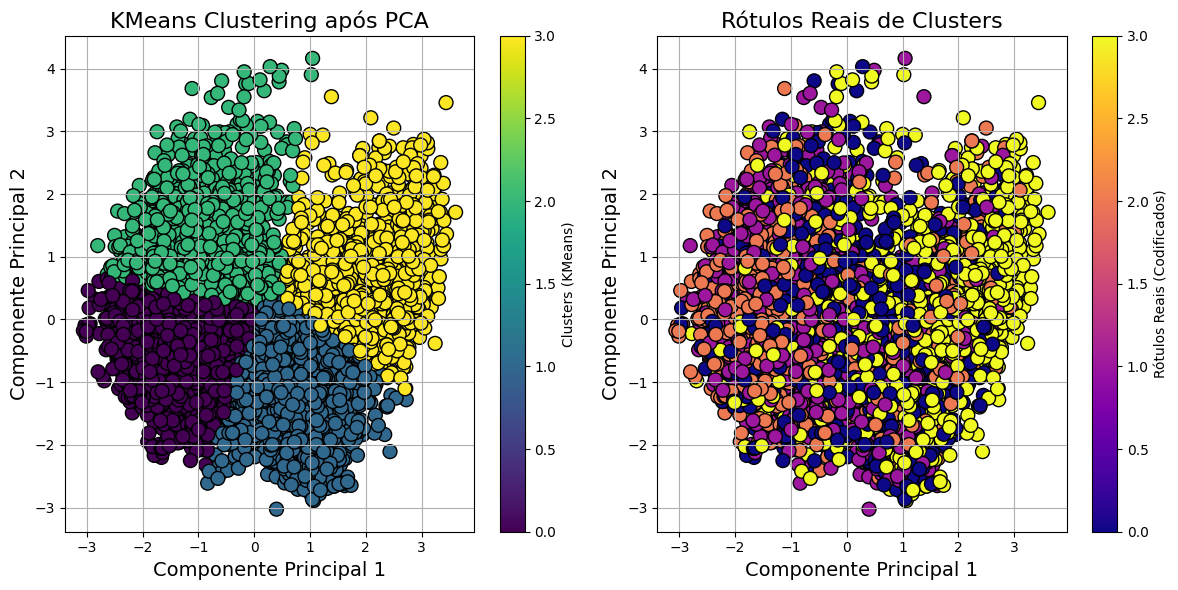

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder




# Passo 1: Normalizar os dados
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(X)

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalizado)

# Passo 3: Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Passo 4: Mapear os rótulos reais para valores numéricos
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Transformar 'A', 'B', 'C', 'D' em 0, 1, 2, 3

# Passo 5: Visualizar os resultados
plt.figure(figsize=(12, 6))

# Plotar KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering após PCA', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Clusters (KMeans)')
plt.grid()

# Plotar rótulos reais
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=Y_encoded, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais de Clusters', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Rótulos Reais (Codificados)')
plt.grid()

plt.tight_layout()
plt.show()


In [116]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(Y,kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(Y,kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(Y,kmeans.labels_))

#print("Entropia: ",calcular_entropia(kmeans.labels_))

#print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))




Soma dos quadrados das distâncias até o centróide mais próximo:  5642.454207133868

Coesão:  18.77906781354886

Coeficiente de Silhueta:  0.025907490430752796

Rand Score K-means:  0.6569024008703256

Homogeneidade :  0.09647681708741158

Completude :  0.0970051327603795
